# Задание 2

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import roc_auc_score, precision_score, recall_score, accuracy_score, roc_curve,f1_score, confusion_matrix

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('credit.csv')
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,90000,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
2,50000,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
3,50000,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
4,50000,1,1,2,37,0,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,80000,1,2,2,34,2,2,2,2,2,...,77519.0,82607.0,81158.0,7000.0,3500.0,0.0,7000.0,0.0,4000.0,1
23996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
23997,30000,1,2,2,37,4,3,2,-1,0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
23998,80000,1,3,1,41,1,-1,0,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  24000 non-null  int64  
 1   SEX        24000 non-null  int64  
 2   EDUCATION  24000 non-null  int64  
 3   MARRIAGE   24000 non-null  int64  
 4   AGE        24000 non-null  int64  
 5   PAY_1      24000 non-null  int64  
 6   PAY_2      24000 non-null  int64  
 7   PAY_3      24000 non-null  int64  
 8   PAY_4      24000 non-null  int64  
 9   PAY_5      24000 non-null  int64  
 10  PAY_6      24000 non-null  int64  
 11  BILL_AMT1  24000 non-null  float64
 12  BILL_AMT2  24000 non-null  float64
 13  BILL_AMT3  24000 non-null  float64
 14  BILL_AMT4  24000 non-null  float64
 15  BILL_AMT5  24000 non-null  float64
 16  BILL_AMT6  24000 non-null  float64
 17  PAY_AMT1   24000 non-null  float64
 18  PAY_AMT2   24000 non-null  float64
 19  PAY_AMT3   24000 non-null  float64
 20  PAY_AM

In [5]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
count,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,...,24000.000000,24000.000000,24000.000000,24000.000000,2.400000e+04,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000
mean,167876.403333,1.600917,1.850958,1.553000,35.446708,-0.023875,-0.140500,-0.170000,-0.221500,-0.266833,...,43172.528083,40190.249458,38722.892708,5687.489833,5.928435e+03,5227.245458,4766.803417,4774.861792,5280.923917,0.221083
std,129907.454723,0.489720,0.787361,0.521331,9.180845,1.123806,1.194216,1.198712,1.171784,1.133220,...,64075.909188,60385.391344,59259.183390,17011.021882,2.423232e+04,17918.982291,15421.988078,15400.224129,18214.205137,0.414985
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-53007.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2294.000000,1718.500000,1238.000000,1000.000000,8.200000e+02,390.000000,285.000000,239.750000,111.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19000.000000,18059.500000,16846.000000,2102.500000,2.013000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54837.250000,50320.000000,49327.500000,5011.000000,5.000000e+03,4512.000000,4040.250000,4024.250000,4010.500000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


In [6]:
df.shape

(24000, 24)

In [7]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'],
      dtype='object')

## Визуализация

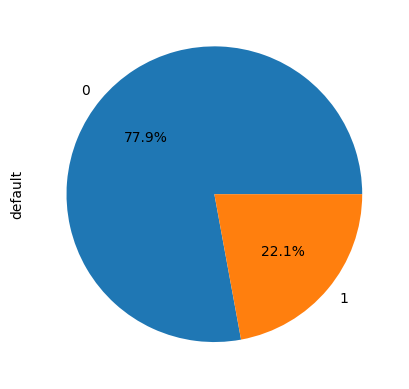

In [8]:
import matplotlib.pyplot as plt

df['default'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

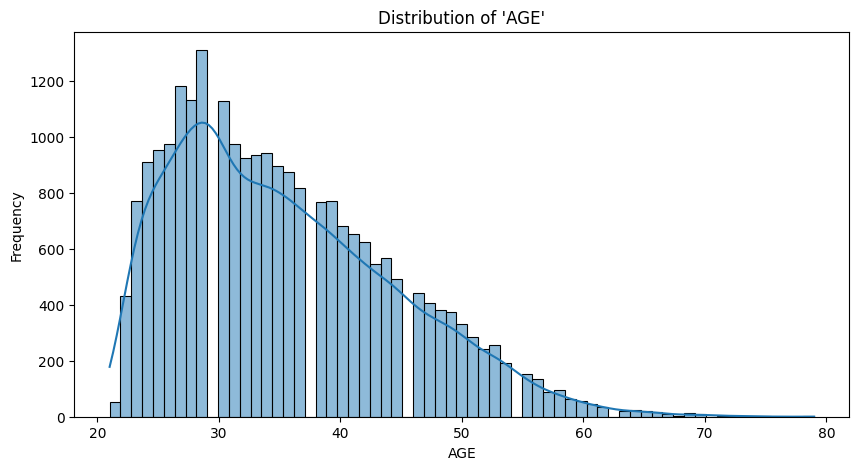

In [9]:
plt.figure(figsize=(10,5))
sns.histplot(df['AGE'], kde=True)
plt.title("Distribution of 'AGE'")
plt.xlabel("AGE")
plt.ylabel("Frequency")
plt.show()

#### Матрица корреляции

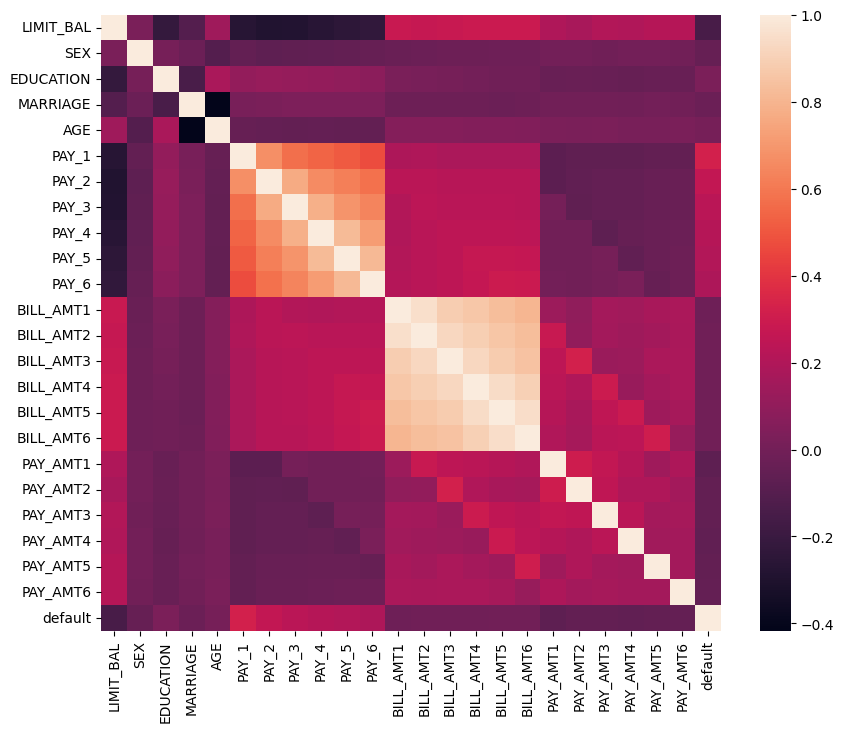

In [10]:
# Создание графика и задание его размеров
fig = plt.figure(figsize=(10, 8))

sns.heatmap(df.corr(), annot = False, fmt=".2f") # annot добавляет значение корреляции

# Отображение графика
plt.show()

#### Диаграмма рассеяния

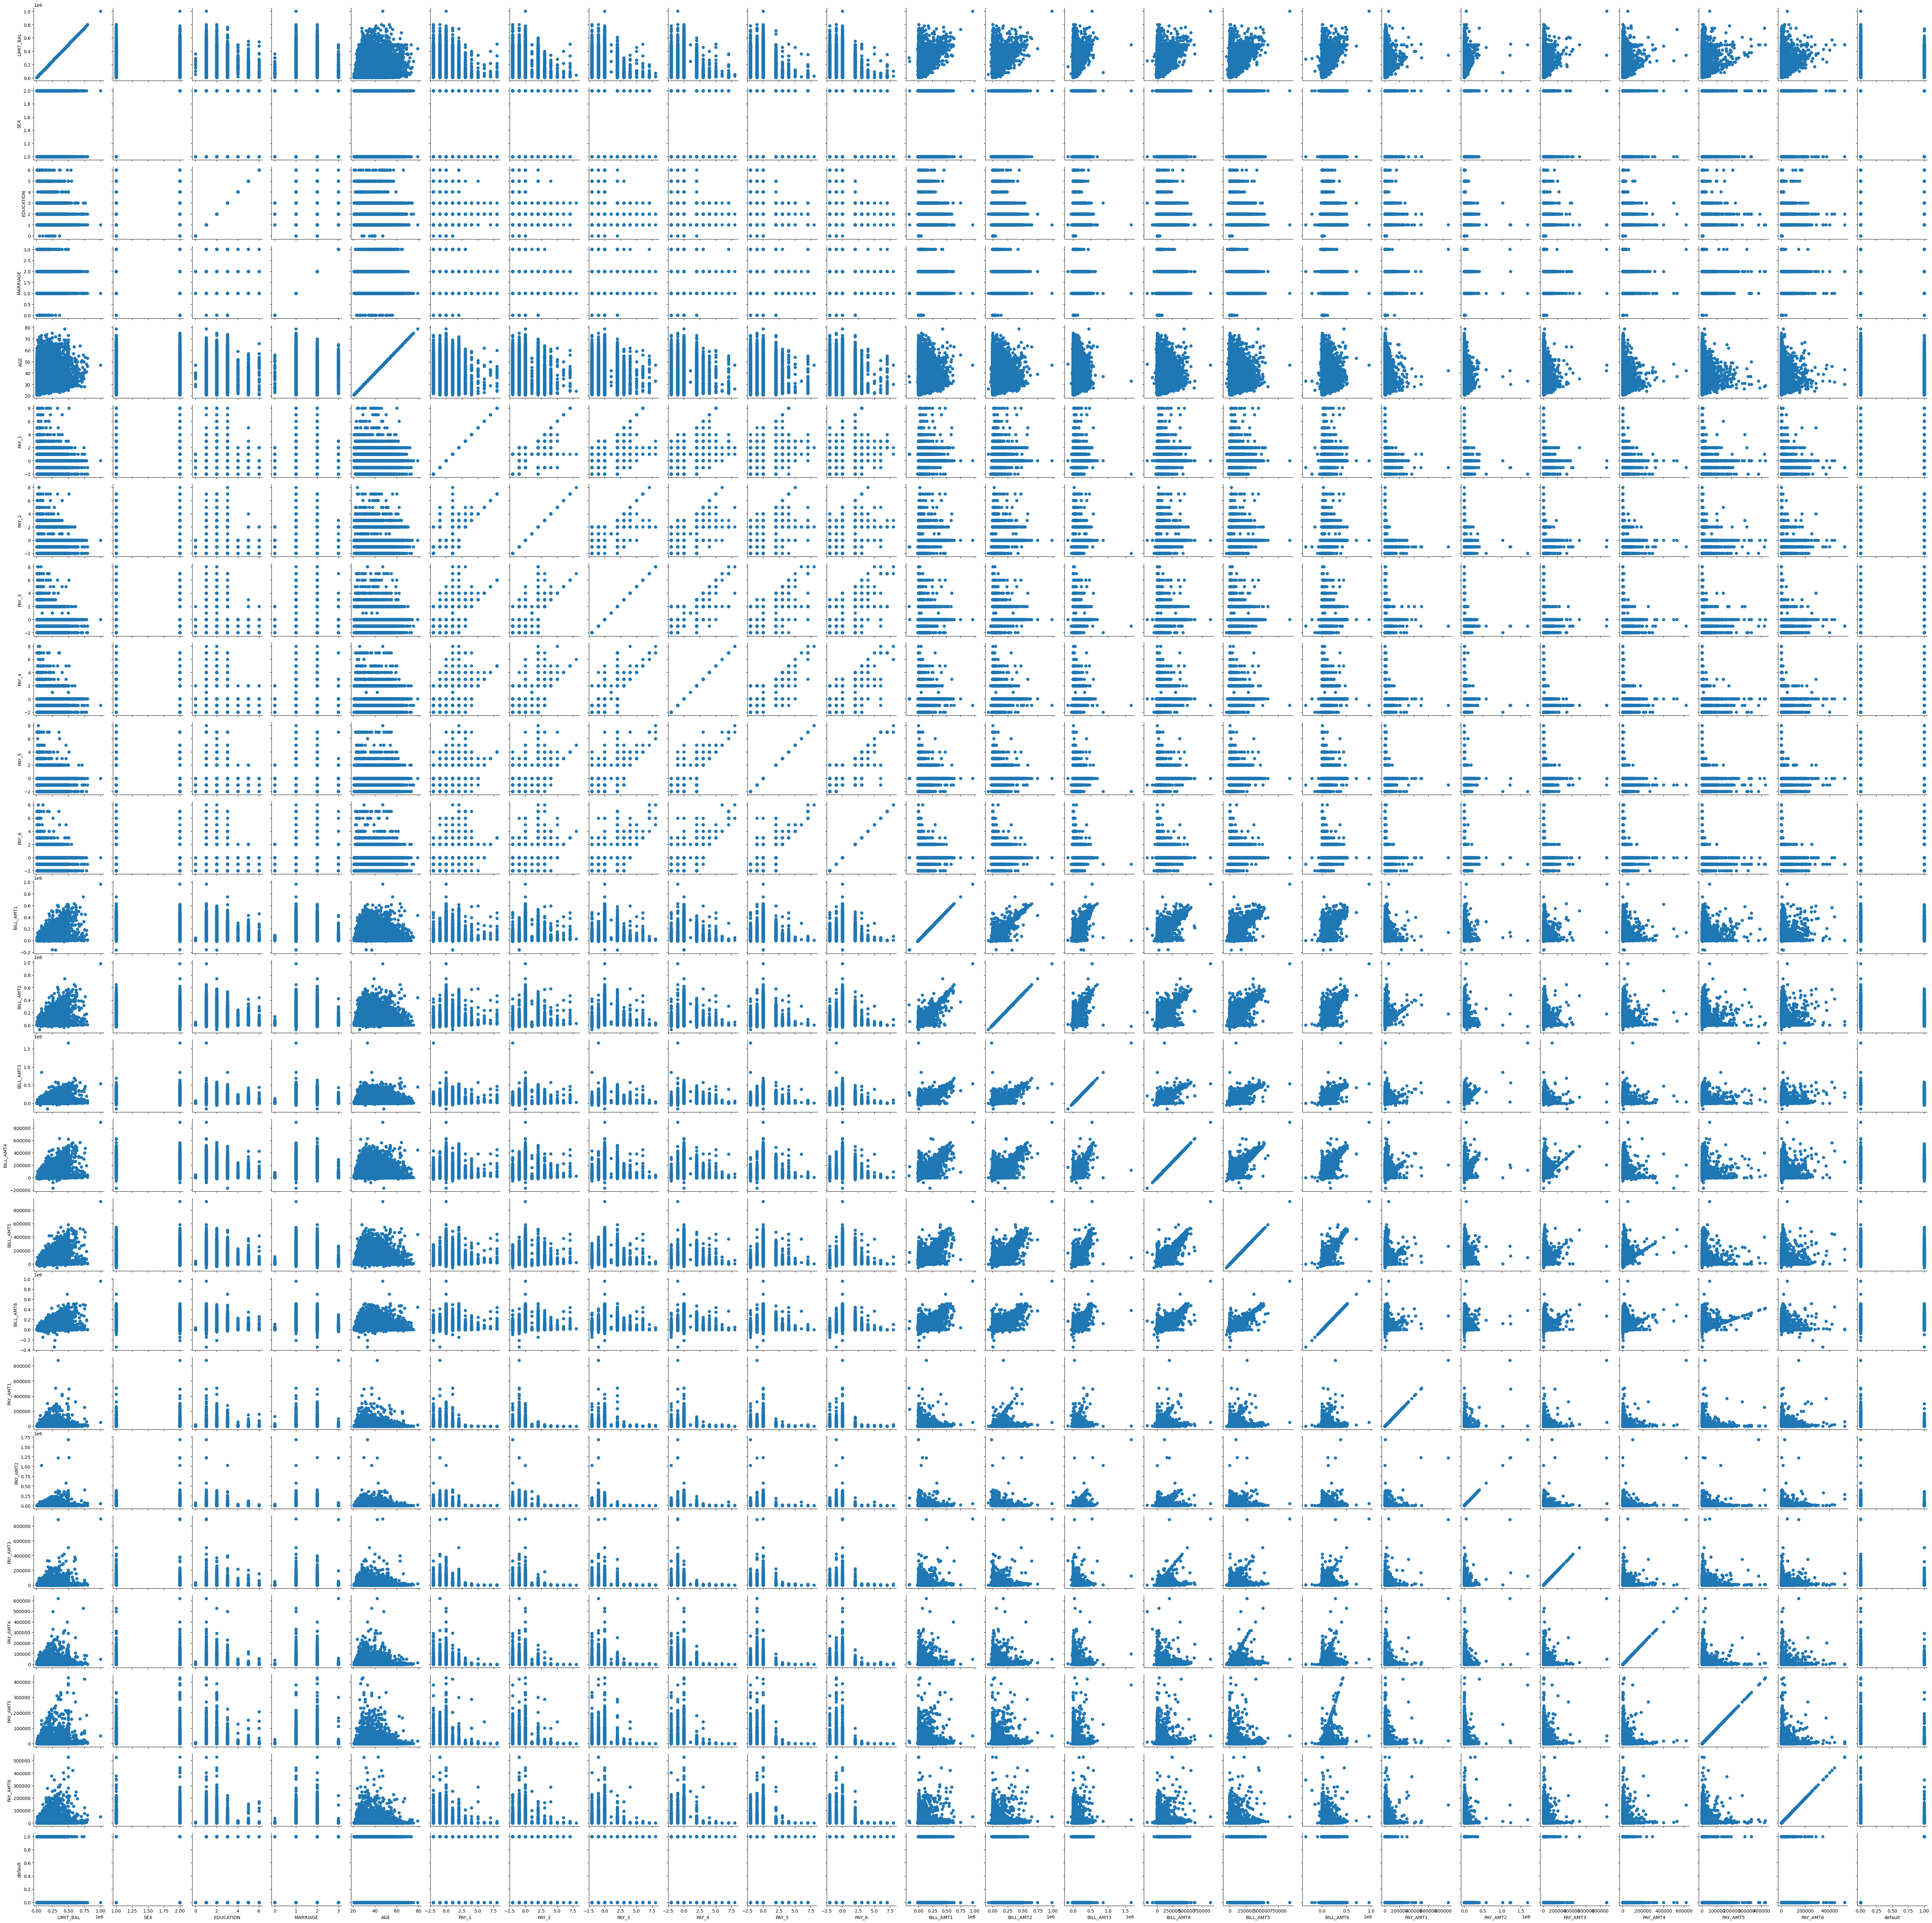

In [11]:
graph = sns.PairGrid(df) # строим сетку по 2 признакам для каждого столбца таблицы
graph.map(plt.scatter) # строим графики из точек для всех элементов списка
plt.show()

## Предварительный анализ и обработка данных

### Проверка пропущенных значений

In [12]:
missing_values = df.isnull().sum()
pd.DataFrame(missing_values, columns=['Missing values, %']) / len(df) * 100

,"Missing values, %"
LIMIT_BAL,0.0
SEX,0.0
EDUCATION,0.0
MARRIAGE,0.0
AGE,0.0
PAY_1,0.0
PAY_2,0.0
PAY_3,0.0
PAY_4,0.0
PAY_5,0.0


In [13]:
target = 'default'
X = df.drop(columns=[target])
y = df[target]

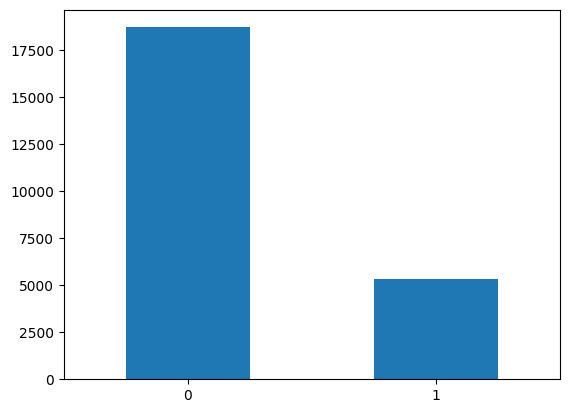

In [14]:
targets_counts = pd.value_counts(y)
targets_counts.plot.bar(rot=0)
plt.show()

In [15]:
n_classes = len(targets_counts)
n_classes

2

In [16]:
from sklearn import preprocessing

In [17]:
encoder = preprocessing.LabelEncoder().fit(y)
y = encoder.transform(y)

In [18]:
X = pd.get_dummies(X)

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
from torch.utils.data import TensorDataset, DataLoader

In [21]:
y_train=np.vstack(y_train).astype(np.float64)
y_test=np.vstack(y_test).astype(np.float64)


X_train, y_train, X_test, y_test = torch.tensor(X_train.values, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32), torch.tensor(X_test.values, dtype=torch.float32), torch.tensor(y_test, dtype=torch.float32)

In [22]:
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

batch_size = 20

train_dl = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size)

test_dl = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

In [23]:
model = nn.Sequential(
    nn.Linear(23,36),
    nn.LeakyReLU(),
    nn.Linear(36,36),
    nn.LeakyReLU(),
    nn.Linear(36,1),
    nn.Sigmoid()
)


In [24]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters())
train_losses = []
test_losses = []

# Обучение модели
for epoch in range(20):
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_dl):
        optimizer.zero_grad()
        outputs = model(inputs)
        #print(outputs)
        loss = criterion(outputs.squeeze(), labels.squeeze())
        train_losses.append(loss.item())
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print('Epoch %d loss: %.3f' % (epoch + 1, running_loss / len(train_dl)))

Epoch 1 loss: 77.750
Epoch 2 loss: 77.750
Epoch 3 loss: 77.750
Epoch 4 loss: 77.750
Epoch 5 loss: 77.750
Epoch 6 loss: 77.750
Epoch 7 loss: 77.750
Epoch 8 loss: 77.750
Epoch 9 loss: 77.750
Epoch 10 loss: 77.750
Epoch 11 loss: 77.750
Epoch 12 loss: 77.750
Epoch 13 loss: 77.750
Epoch 14 loss: 77.750
Epoch 15 loss: 77.750
Epoch 16 loss: 77.750
Epoch 17 loss: 77.750
Epoch 18 loss: 77.750
Epoch 19 loss: 77.750
Epoch 20 loss: 77.750


In [25]:
y_true, y_pred = [], []
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_dl:
        outputs = model(inputs)
        predicted = (outputs > 0.5).float()
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        y_true.extend(labels.tolist())
        y_pred.extend(predicted.tolist())

print('Accuracy: %.3f' % (correct / total))

f1_score(y_test,y_pred)
recall = recall_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
roc_auc = roc_auc_score(y_true, y_pred)
print('Recall: %.3f' % recall)
print('Precision: %.3f' % precision)
print('ROC-AUC: %.3f' % roc_auc)
print('f1-score: %.3f' % roc_auc)
confusion_matrix(y_true, y_pred)

Accuracy: 0.215
Recall: 1.000
Precision: 0.215
ROC-AUC: 0.500
f1-score: 0.500


array([[   0, 3766],
       [   0, 1034]])

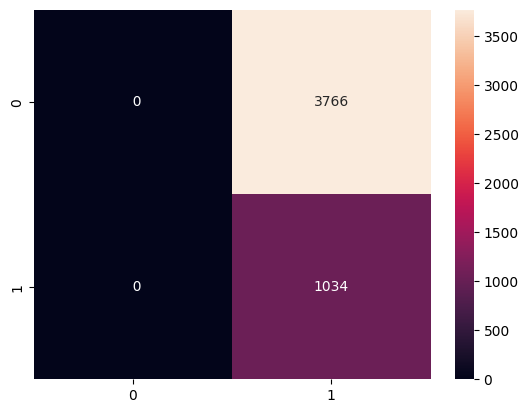

In [26]:
import seaborn as sns

sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt="3d");

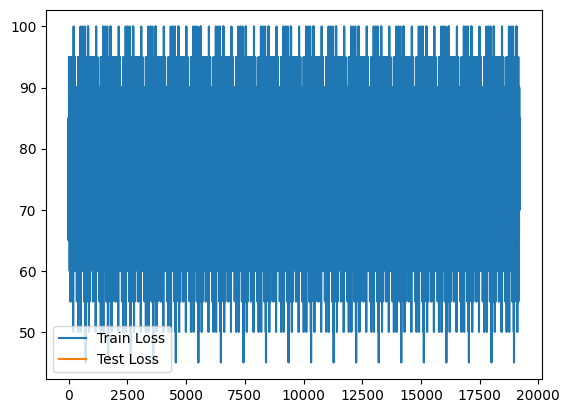

In [27]:
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.legend()
plt.show()

# Задание 3

In [ ]:
import torch
import matplotlib.pyplot as plt

In [ ]:
plt.style.use('grayscale')

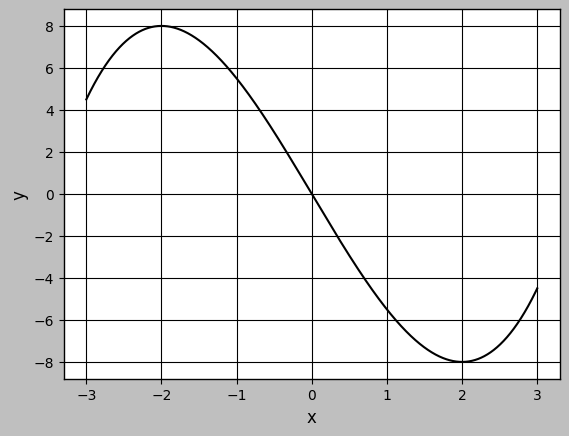

In [ ]:
f = lambda x: 0.5*x**3-6*x
start, end = -3.0, 3.0
x = torch.arange(start, end + 1e-3, 1e-3)
plt.plot(x, f(x))
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
tol = 0.1 # погрешность
optim_step = 0.1 # величина шага

переменная начальной точки optim_x и градиент для обратного распространения (requires_grad=True)

In [ ]:
optim_x = torch.tensor(1.0, requires_grad=True)

In [ ]:
optim_history = [optim_x.item()]

In [ ]:
while True:
    f(optim_x).backward()
    with torch.no_grad():
        optim_x -= optim_step * optim_x.grad
        optim_x.clamp_(start, end)
        print(optim_x)
    optim_history.append(optim_x.item())
    if torch.isnan(f(optim_x)) or torch.isinf(f(optim_x)):
        break
    grad_norm = torch.linalg.norm(optim_x.grad)
    optim_x.grad.zero_()
    if grad_norm <= tol or optim_x - optim_history[-2] == 0:
        break

tensor(1.4500, requires_grad=True)
tensor(1.7346, requires_grad=True)
tensor(1.8833, requires_grad=True)
tensor(1.9513, requires_grad=True)
tensor(1.9802, requires_grad=True)
tensor(1.9920, requires_grad=True)
tensor(1.9968, requires_grad=True)


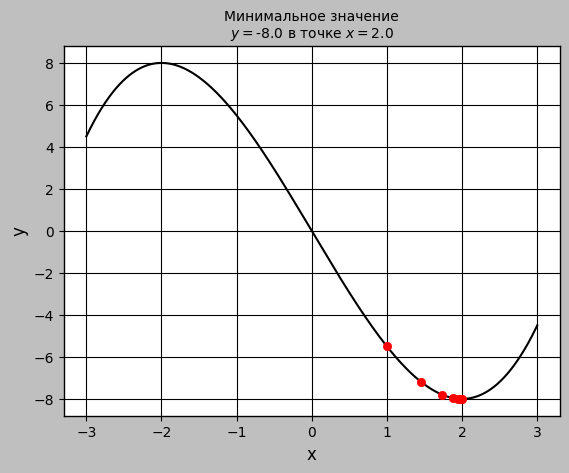

In [ ]:
optim_history = torch.tensor(optim_history)
title = ('Минимальное значение\n'
         '${y = }$' + f'{f(torch.round(optim_history[-1]))} '
         'в точке ${x = }$' f'{torch.round(optim_history[-1])}')
plt.title(title, size=10)
plt.plot(x, f(x))
plt.scatter(optim_history, f(optim_history), color='r', zorder=2)
plt.xlabel('x')
plt.ylabel('y')
plt.show()